In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Allahabad.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Domino's Pizza,700,"Pizza,Fast Food",Allahabad,Civil Lines,Quick Bites,11am to 11pm(Mon-Sun),Good,3.7,518
1,Pizza Hut,700,"Italian,Pizza",Allahabad,Civil Lines,Casual Dining,11am to 11pm(Mon-Sun),Very Good,4.0,567
2,Well Bean Cafe,500,Cafe,Allahabad,Civil Lines,Café,11am to 11pm(Mon-Sun),Very Good,4.4,286
3,Old School Cafe,1000,"Cafe,North Indian,Continental,Chinese,Indian,T...",Allahabad,Civil Lines,Café,11am to 11pm(Mon-Sun),Very Good,4.4,360
4,KFC,600,"Burger,Fast Food",Allahabad,Civil Lines,Quick Bites,11am to 11pm(Mon-Sun),Very Good,4.2,432


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 10 columns):
Name                242 non-null object
Price               242 non-null int64
Cuisine_Category    242 non-null object
City                242 non-null object
Region              242 non-null object
Cuisine_Type        242 non-null object
Timing              242 non-null object
Rating_Types        242 non-null object
Rating              242 non-null float64
Votes               242 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 19.0+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,242.000000,242.000000,242.000000
mean,432.851240,3.545455,77.590909
std,236.119499,0.433168,172.642418
min,100.000000,2.600000,4.000000
25%,250.000000,3.225000,12.000000
50%,400.000000,3.600000,27.500000
75%,500.000000,3.800000,79.000000
max,2000.000000,4.900000,2221.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              0
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Dosa Plaza               2
Malt                     2
Bebo's Kitchen           1
Paradise Confectioner    1
Temptation's             1
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Civil Lines     119
Katra            23
Naini            20
Dhoomanganj      15
George Town      11
Tagore Town       9
Ashok Nagar       7
Teliarganj        6
Colonel Ganj      5
Rajrooppur        4
Name: Region, dtype: int64

Text(0.5,1,'Region')

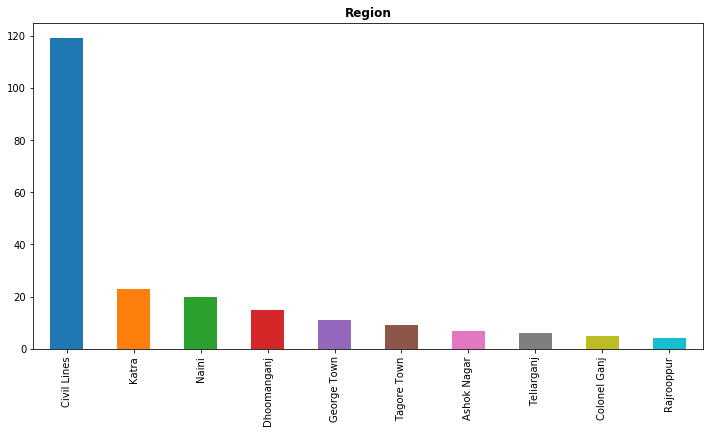

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

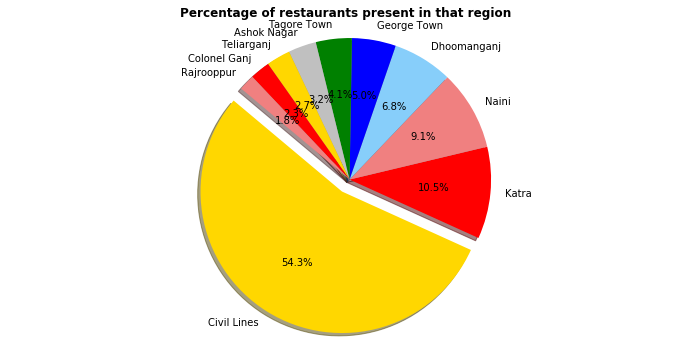

In [11]:
plt.figure(figsize = (12,6))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average        104
Good            93
Very Good       39
Excellent        4
Dobré            1
Sangat Baik      1
Name: Rating_Types, dtype: int64

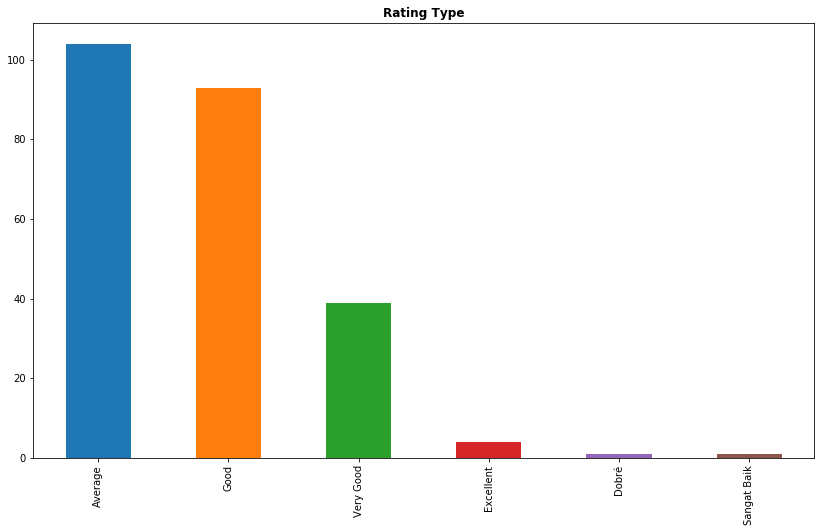

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       85
Casual Dining     82
Café              24
Dessert Parlor    15
Bakery             8
Sweet Shop         6
none               4
Dhaba              4
Beverage Shop      3
Bhojanalya         3
Name: Cuisine_Type, dtype: int64

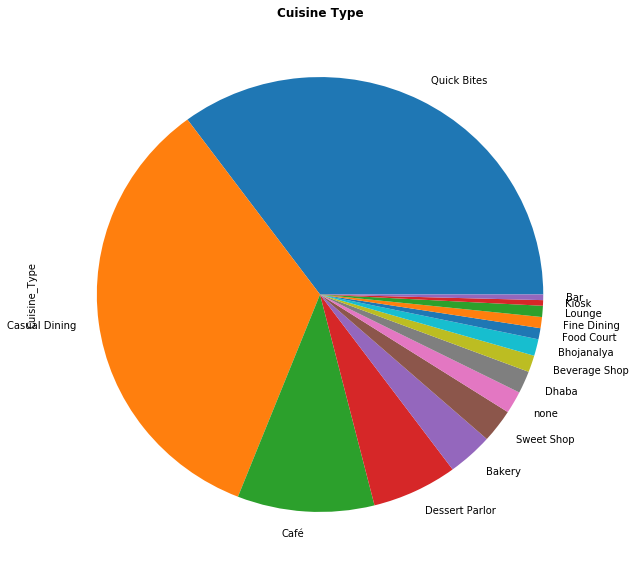

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [ ]:
#We have the most frequently visited Restaurant type - QuickBites

# Ratings

In [16]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [17]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.545454545454546


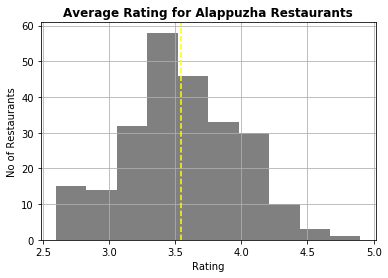

In [18]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Alappuzha Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [19]:
#Average rating per restaurant in Ajmer is found to be around 3.54

# Top cuisines in Alappuzha 

In [20]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

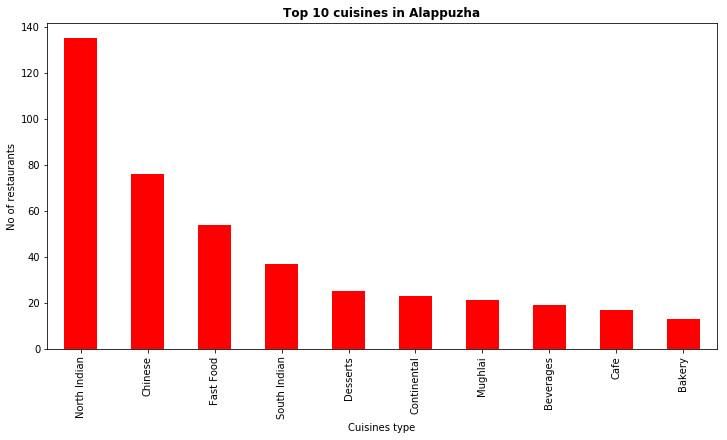

In [21]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Alappuzha',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [22]:
data['Price'].value_counts()[:20]

500     46
300     36
400     32
200     28
250     20
600     19
150     11
450     10
700     10
1000     8
800      7
350      5
100      3
550      2
2000     1
1250     1
1400     1
850      1
750      1
Name: Price, dtype: int64

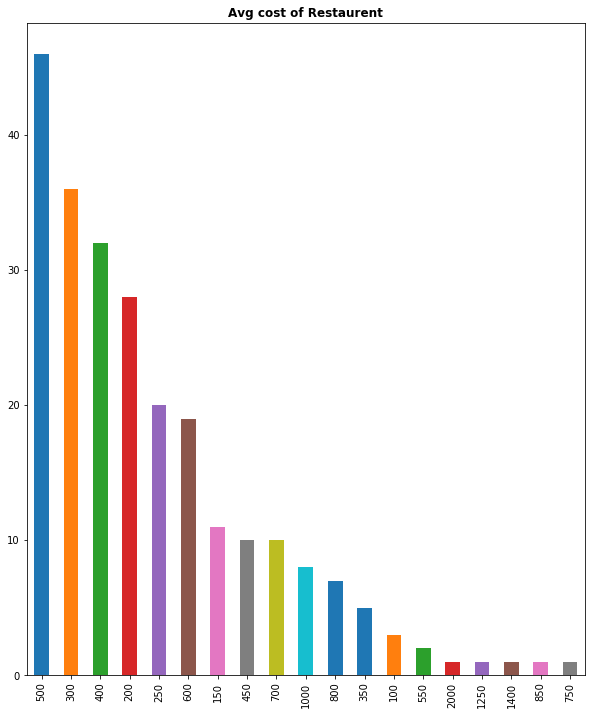

In [23]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [24]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

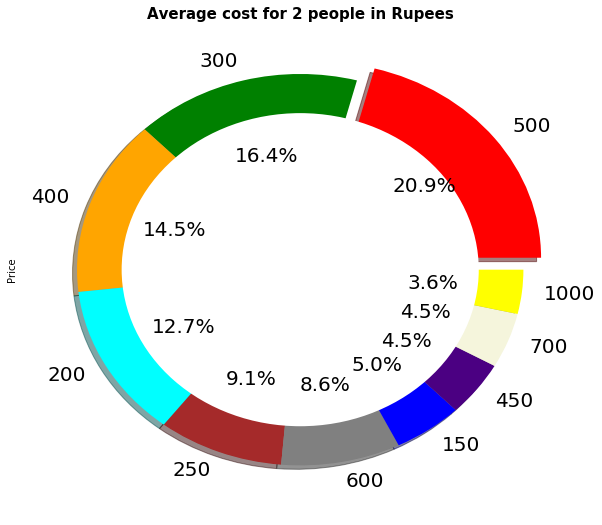

In [25]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 500